In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

import phmm as pm

In [45]:
obs =[[ 835,  819,  771,  565,  346,  135,  109,  160,  244,  555,  627,
        724,  803,  896,  915,  858,  856,  698,  998,  993, 1107, 1073,
       1009,  977,  958,  860,  742,  621,  409,  170,  182,  266,  331,
        486,  554,  675,  748,  702,  855,  888,  919,  878,  903,  851,
        832,  372,  270,  157,  153,  136,  171,  244,  478,  803,  908,
        951,  911,  864,  849,  924,  920,  916,  994,  972,  947,  945,
        914,  793,  694,  554,  361,  215,  181,  122,  176,  260,  568,
        972, 1005, 1068,  996, 1049, 1121, 1087,  960, 1088, 1090,  866,
       1035, 1147, 1047,  873,  747,  627,  444,  245,  165,  144,  179,
        324,  576,  961,  994, 1032,    0,  802,  896, 1015,  894,  943,
       1107, 1103, 1109, 1160, 1003,  850,  763,  672,  503,  292,  207,
        162,  189,  304,  509,  929,  936,  968,  983,  987, 1018,  965,
        948,  925, 1081, 1037, 1128, 1267, 1093,  966,  843,  867,  843,
        633,  426,  367,  245,  268,  510,  573,  893,  883,  992,  997,
        935, 1065, 1002, 1021, 1121,  973, 1178, 1375, 1362, 1231, 1055,
        916,  963,  992,  787,  545,  231,  190,  287,  411,  527,  682,
        768,  909,  968,  990, 1026,  919, 1083, 1095, 1165, 1378, 1389,
       1359, 1214, 1265, 1237, 1110,  900,  652,  316,  161,  237,  273,
        379,  506,  613,  401,  776,  844,  787,  778,  875,  918,  981,
       1039,  968,  780,  643,  499,  412,  289]]

obs_train = [obs[0][:180]]
obs_test = [obs[0][181:]]
obs_test_abnormal = [obs[0][181:]]

In [3]:
def generate_init(n):
    theta = np.random.uniform(0, 1, size=(n*n))
    theta = np.reshape(theta, newshape=(n, n))
    for i in range(n):
        s = sum(theta[i])
        for j in range(n):
            theta[i][j] = theta[i][j]/s        
    delta = np.random.uniform(0, 1, size=n)
    s = sum(delta)
    for i in range(n):
        delta[i] = delta[i]/s        
    lambdas = np.ones(n)
    return theta, delta, lambdas

def phmm(n, obs):
    # Random parameters
    theta, delta, lambdas = generate_init(n)
    model = pm.PHMM(delta, theta, lambdas)
    model.baum_welch(obs,50)
    return model

def run_with_m(m, obs):
    model = []
    for nstate in range(1, m+1):
        model.append(phmm(nstate, obs))
    return model

In [101]:
def get_CDLL(m, obs):
    result = []
    for ite in range(m+1):
        result.append(model[i].log_likelihood(obs_train[0]))

def get_AIC(model, obs):
    AIC = []
    for ite in range(len(model)):
        AIC.append(pm.AIC(model[ite], obs))
    return AIC

def get_BIC(model, obs):
    BIC = []
    for ite in range(len(model)):
        BIC.append(pm.BIC(model[ite], obs))
    return BIC

def generate_graph_data(state_sequence, rate_vector):
    expected_mean = []
    for state in state_sequence:
        expected_mean.append(rate_vector[state])
    return expected_mean

In [5]:
model = run_with_m(8, obs_train)

In [6]:
AIC = get_AIC(model, obs_train)
BIC = get_BIC(model, obs_train)

In [7]:
print(AIC)
print(BIC)

[32792.115769372824, 8605.453275946324, 5062.019703596478, 4067.3065432346853, 3616.1365220288667, 3624.2176869405616, 3397.733696179322, 3431.7771566213946]
[32795.30872622372, 8618.225103349885, 5090.75631525449, 4118.393852848929, 3695.960443301122, 3739.164133572609, 3554.1885818729424, 3636.126395078368]


In [105]:
expected_mean = []
for i in range(3, 7):
    expected_mean.append(generate_graph_data(model[i].viterbi(obs_train[0]),model[i].lambdas))

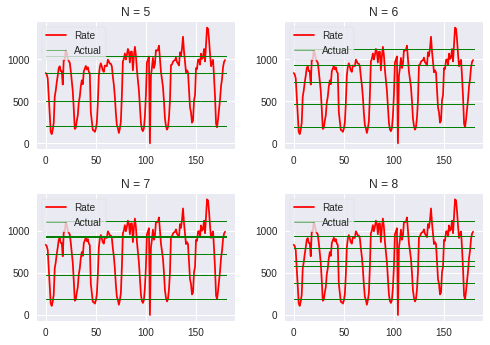

In [106]:
time = list(range(len(obs_train[0])))

plt.style.use('seaborn')

fig = plt.figure()
fig.subplots_adjust(hspace=0.35, wspace=0.25)

ax1 = fig.add_subplot(221)
ax1.plot(time, obs_train[0],c='r')
# ax1.scatter(time, obs[0])
# ax1.scatter(time, expected_mean[0])
# ax1.plot(time, expected_mean[0])
for i in range(len(expected_mean[0])):
    ax1.plot([0,180], [expected_mean[0][i],expected_mean[0][i]], linewidth=0.5, c='g')
ax1.legend(['Rate','Actual'],loc='upper left',frameon=True)
ax1.title.set_text("N = 4")

ax2 = fig.add_subplot(222)
ax2.plot(time, obs_train[0],c='r')
# ax2.scatter(time, obs[0])
# ax2.scatter(time, expected_mean[1])
# ax2.plot(time, expected_mean[1])
for i in range(len(expected_mean[1])):
    ax2.plot([0,180], [expected_mean[1][i],expected_mean[1][i]], linewidth=0.5, c='g')
ax2.legend(['Rate','Actual'],loc='upper left',frameon=True)
ax2.title.set_text("N = 5")

ax3 = fig.add_subplot(223)
ax3.plot(time, obs_train[0],c='r')
# ax3.scatter(time, obs[0])
# ax3.plot(time, expected_mean[2])
for i in range(len(expected_mean[2])):
    ax3.plot([0,180], [expected_mean[2][i],expected_mean[2][i]], linewidth=0.5, c='g')
ax3.legend(['Rate','Actual'],loc='upper left',frameon=True)
ax3.title.set_text("N = 6")

ax4 = fig.add_subplot(224)
ax4.plot(time, obs_train[0],c='r')
# ax4.scatter(time, obs[0])
# ax4.scatter(time, expected_mean[3])
# ax4.plot(time, expected_mean[3])
for i in range(len(expected_mean[3])):
    ax4.plot([0,180], [expected_mean[3][i],expected_mean[3][i]], linewidth=0.5, c='g')
ax4.legend(['Rate','Actual'],loc='upper left',frameon=True)
ax4.title.set_text("N = 7")

plt.savefig('visualized.png',dpi=600, pad_inches=0, bbox_inches='tight')

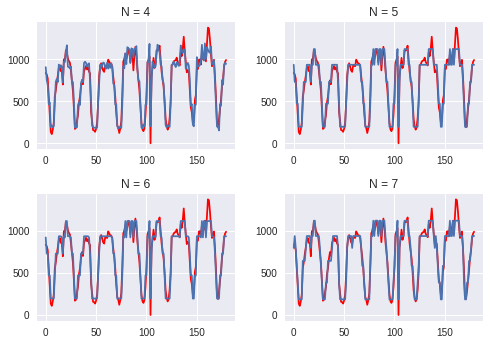

In [109]:
time = list(range(len(obs_train[0])))

plt.style.use('seaborn')

fig = plt.figure()
fig.subplots_adjust(hspace=0.35, wspace=0.25)


ax1 = fig.add_subplot(221)
ax1.plot(time, obs_train[0],c='r')
# ax1.scatter(time, obs[0])
# ax1.scatter(time, expected_mean[0])
ax1.plot(time, expected_mean_train)
# for i in range(len(expected_mean[0])):
#     ax1.plot([0,100], [expected_mean[0][i],expected_mean[0][i]], linewidth=0.5, c='g')
ax1.title.set_text("N = 4")

ax2 = fig.add_subplot(222)
ax2.plot(time, obs_train[0],c='r')
# ax2.scatter(time, obs[0])
# ax2.scatter(time, expected_mean[1])
ax2.plot(time, expected_mean[1])
# for i in range(len(expected_mean[1])):
#     ax2.plot([0,100], [expected_mean[1][i],expected_mean[1][i]], linewidth=0.5, c='g')
ax2.title.set_text("N = 5")

ax3 = fig.add_subplot(223)
ax3.plot(time, obs_train[0],c='r')
# ax3.scatter(time, obs[0])
ax3.plot(time, expected_mean[2])
# for i in range(len(expected_mean[2])):
#     ax3.plot([0,100], [expected_mean[2][i],expected_mean[2][i]], linewidth=0.5, c='g')
ax3.title.set_text("N = 6")

ax4 = fig.add_subplot(224)
ax4.plot(time, obs_train[0],c='r')
# ax4.scatter(time, obs[0])
# ax4.scatter(time, expected_mean[3])
ax4.plot(time, expected_mean[3])
# for i in range(len(expected_mean[3])):
#     ax4.plot([0,100], [expected_mean[3][i],expected_mean[3][i]], linewidth=0.5, c='g')
ax4.title.set_text("N = 7")
# ax4.plot(time, expected_mean[3], c='g')

plt.savefig('visualized_2.png',dpi=600, pad_inches=0, bbox_inches='tight')

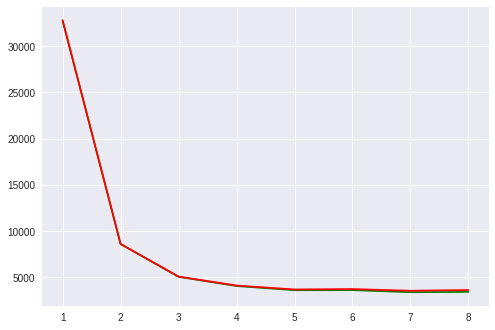

In [110]:
legend = ['AIC', 'BIC']
plt.plot(list(range(1, len(AIC)+1)), AIC,c='g')
plt.plot(list(range(1, len(BIC)+1)), BIC, c='r')
# plt.legend(legend, loc='best')
plt.savefig('AIC-BIC.png', dpi=600, pad_inches=0, bbox_inches='tight')

f.write(str(AIC))
f.close

f = open("save_data_CDLL.txt", "w")
t = ','
l_list = []
for m in model:
    l_list.append(str(m.log_likelihood(obs)))
t = t.join(l_list)
f.writelines(t)
f.close()

In [102]:
l_list = []
for m in model:
    l_list.append(m.log_likelihood(obs))

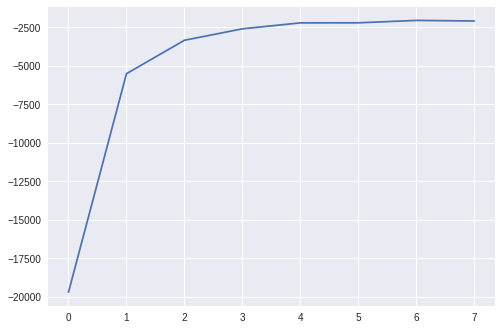

In [103]:
plt.plot(list(range(len(l_list))), l_list)
plt.savefig('CDLL.png',dpi=600, pad_inches=0, bbox_inches='tight')

In [ ]:
plt.plot(list(range(len(obs[0]))), obs[0])
plt.savefig('vsdata.png',dpi=600, pad_inches=0, bbox_inches='tight')

In [ ]:
for i in range(0, 5):
    print(np.around(np.exp(model[i].delta), 4))

In [ ]:
model[4].lambdas

In [ ]:
matrix = np.around(np.exp(model[4].theta), 4)

In [30]:
def generate_predict(state_sequence, rate_vector):
    expected_mean = []
    for state in state_sequence:
        expected_mean.append(sc.stats.poisson(rate_vector[state]).rvs())
    return expected_mean

In [ ]:
matrix

In [ ]:
for i in range(5):
    print(1/(1-matrix[i][i]))

In [ ]:
model[4].viterbi(obs_test[0])

In [48]:
for i in range(len(obs_test[0])):
    if i in range(17,22):
        obs_test_abnormal[0][i] = sc.stats.poisson(1200).rvs()
expected_mean_test = generate_predict(model[4].viterbi(obs_test[0]), model[4].lambdas)
expected_mean_train = generate_predict(model[4].viterbi(obs_train[0]), model[4].lambdas)

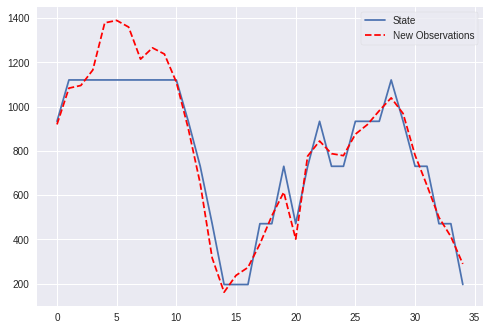

In [120]:
plt.plot(list(range(len(expected_mean_test))), generate_graph_data(model[4].viterbi(obs_test[0]), model[4].lambdas))
plt.plot(list(range(len(obs_test[0]))), obs_test[0], c='r', linestyle='--')
# plt.plot(list(range(len(obs_test_abnormal[0]))), obs_test_abnormal[0], c='r', linestyle='--')
plt.legend(['State','New Observations'], frameon=True)
plt.savefig('TSC.png', dpi=600, pad_inches=0, bbox_inches='tight')

In [23]:
model[4].lambdas

array([ 729.90807424,  195.72756747, 1120.01980217,  933.06913237,
        470.57721955])

In [24]:
34+5

39

In [69]:
np.around(model[4].lambdas, 2)

array([ 729.91,  195.73, 1120.02,  933.07,  470.58])

In [70]:
np.around(np.exp(model[4].theta), 4)

array([[0.4168, 0.    , 0.    , 0.2493, 0.3339],
       [0.0303, 0.7273, 0.    , 0.    , 0.2424],
       [0.    , 0.0344, 0.6264, 0.3392, 0.    ],
       [0.1283, 0.    , 0.1488, 0.7229, 0.    ],
       [0.1664, 0.3334, 0.    , 0.1669, 0.3333]])